In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Titanic dataset
df_train = pd.read_csv('train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

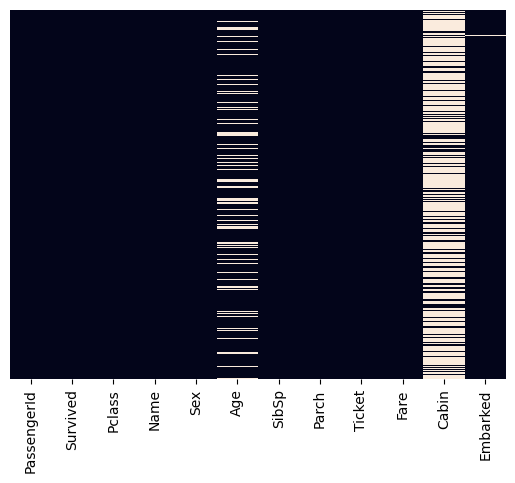

In [5]:
# Visualize missing data
sns.heatmap(df_train.isnull(),cbar=False,yticklabels=False)

In [6]:
# Fill missing values (Age/Fare etc.)
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [7]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


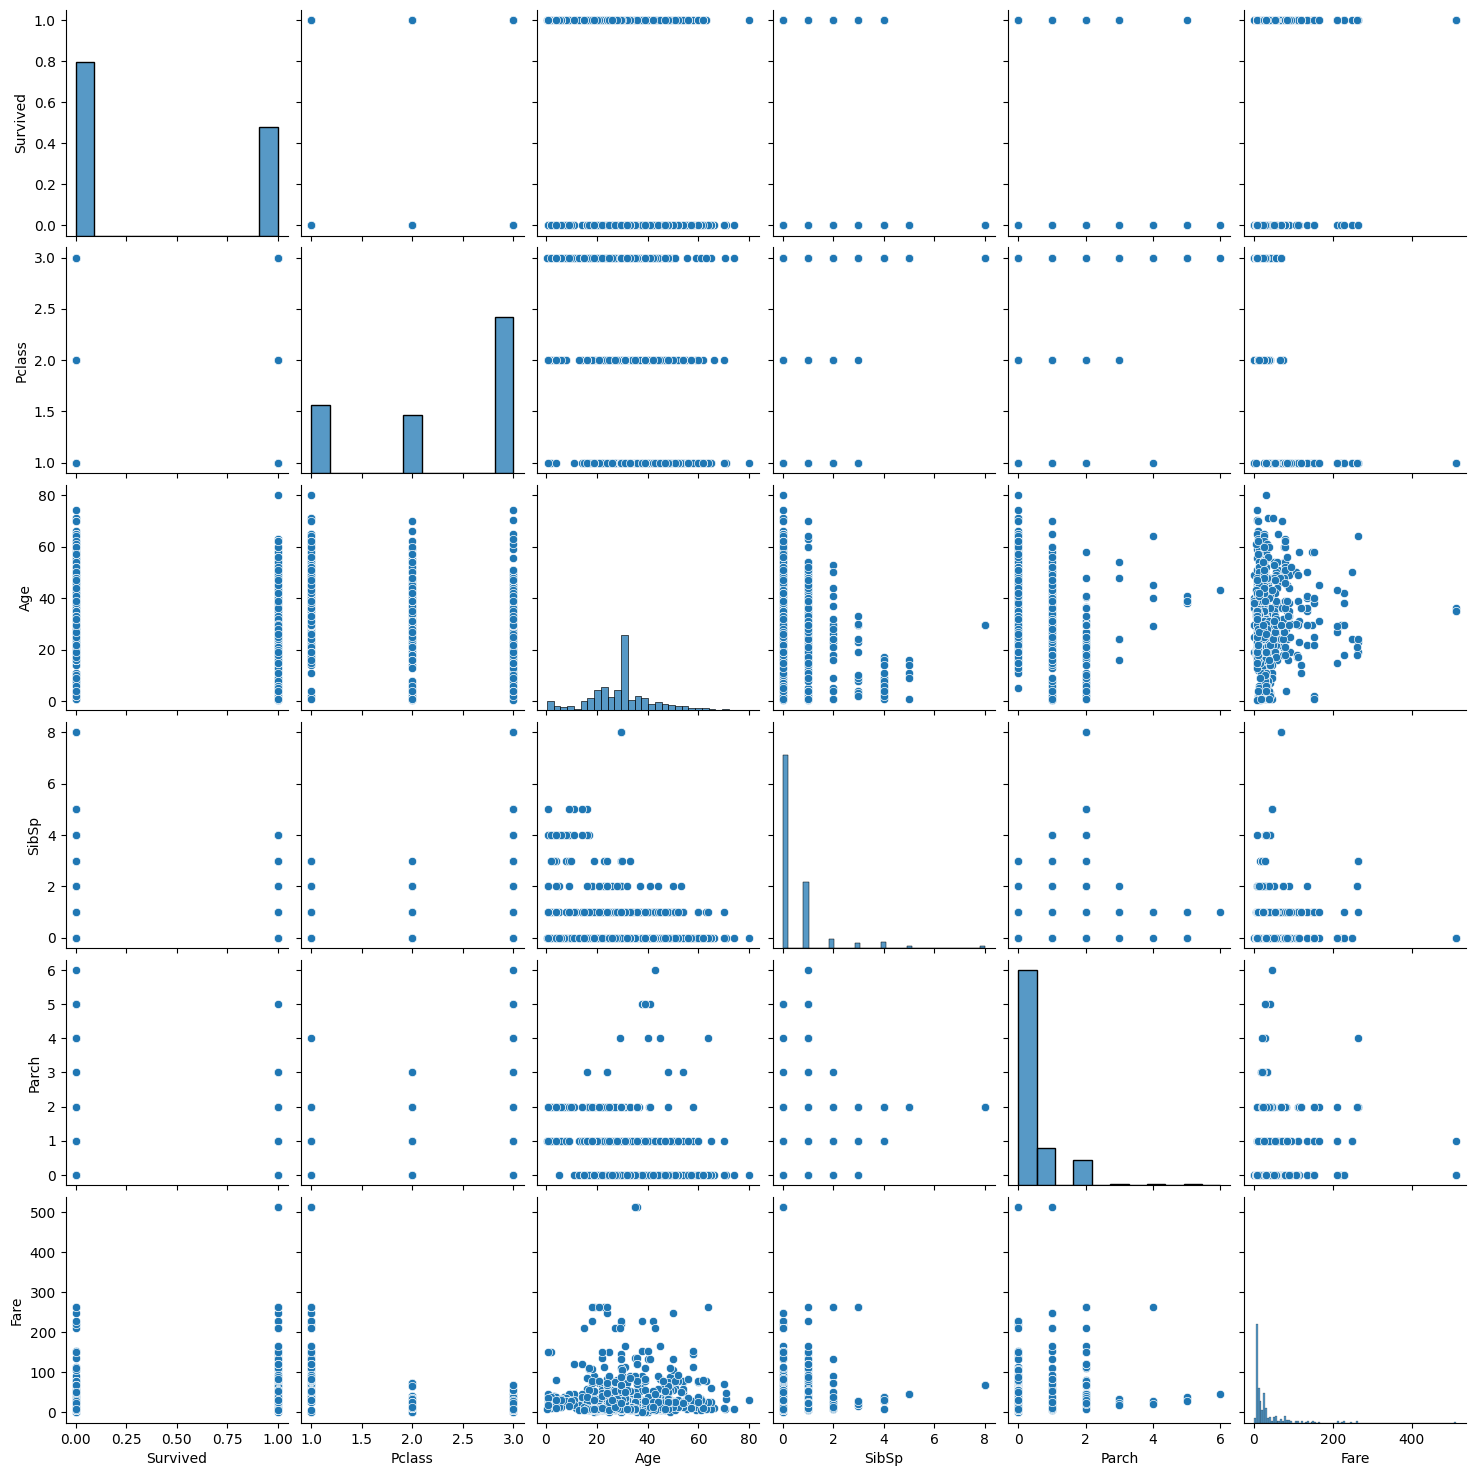

In [8]:
sns.pairplot(df_train)

<Axes: xlabel='Pclass', ylabel='Age'>

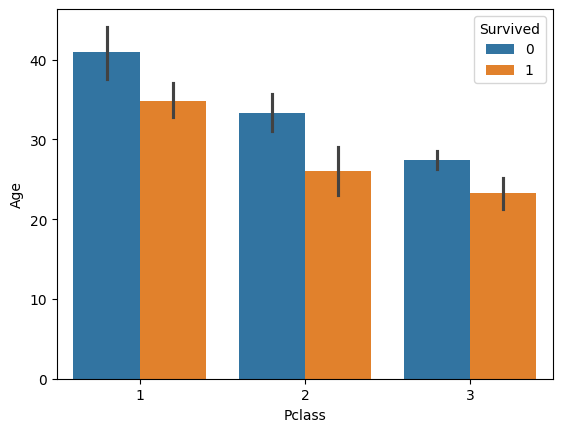

In [9]:
sns.barplot(data=df_train,x='Pclass',y='Age',hue='Survived')

<Axes: xlabel='Sex', ylabel='Count'>

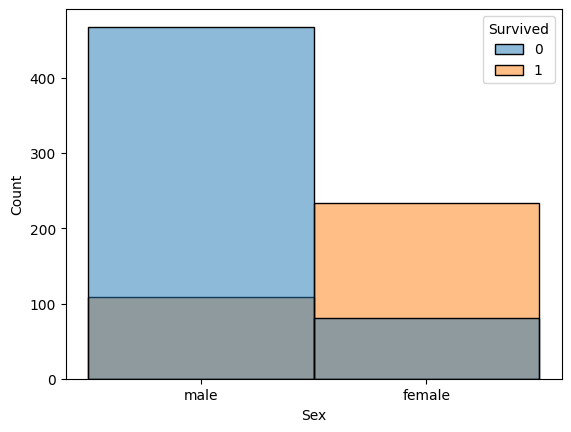

In [10]:
sns.histplot(data=df_train,x='Sex',hue='Survived')

<Axes: >

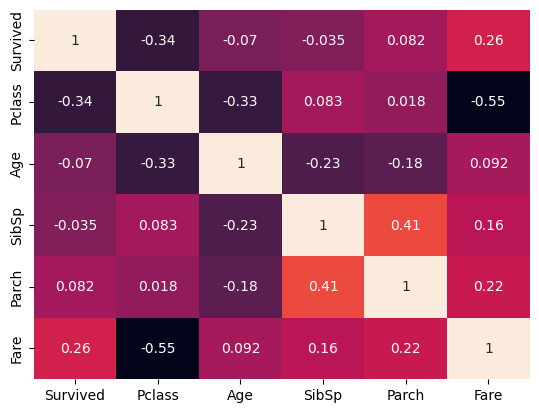

In [11]:
# Drop irrelevant or non-numeric columns
sns.heatmap(df_train.drop(['Sex','Embarked'],axis=1).corr(),cbar=False,annot=True)

<Axes: xlabel='Sex', ylabel='Fare'>

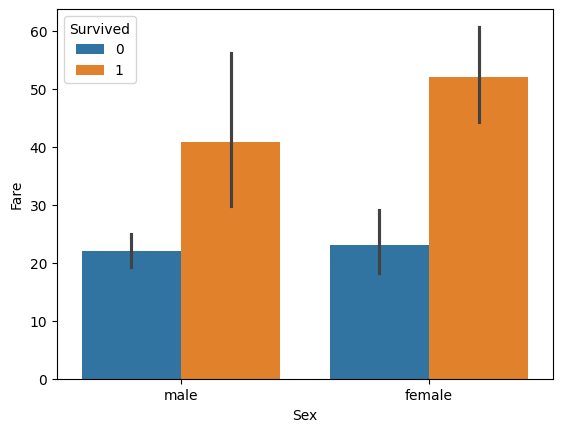

In [12]:
sns.barplot(data=df_train,x='Sex',y='Fare',hue='Survived')

In [13]:
df_train.dropna(inplace=True)

In [14]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
# Encode categorical variables using one-hot encoding
cat_feats = ['Sex','Embarked']
final_train_data = pd.get_dummies(df_train,columns=cat_feats,dtype=int,drop_first=True)

In [16]:
final_train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [17]:
# Standardize numerical features (Pclass, Fare)
from sklearn.preprocessing import StandardScaler

In [18]:
# Fill missing values (Age/Fare etc.)
# Fill missing values first
final_train_data['Pclass'] = final_train_data['Pclass'].fillna(final_train_data['Pclass'].mode()[0])
final_train_data['Fare'] = final_train_data['Fare'].fillna(final_train_data['Fare'].median())

scaler = StandardScaler()
scaled = scaler.fit_transform(final_train_data[['Pclass', 'Fare']])
scaled_df = pd.DataFrame(scaled, columns=['Pclass', 'Fare'])

In [19]:
# Drop irrelevant or non-numeric columns
final_train_data.drop(['Pclass', 'Fare'], axis=1, inplace=True)
final_train_data = pd.concat([final_train_data.reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)
final_train_data.dropna(inplace=True)

In [20]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
# Drop irrelevant or non-numeric columns
x = final_train_data.drop('Survived',axis=1)
y = final_train_data['Survived']

In [22]:
# Split the dataset into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
predictions = lr.predict(x_test)

In [26]:
# Evaluate model performance
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
# Evaluate model performance
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [28]:
# Print confusion matrix
print(confusion_matrix(y_test,predictions))

[[149  14]
 [ 33  71]]
